##### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import urllib.request
import seaborn as sns
import json
import requests
import re
import spacy
nlp = spacy.load("en_core_web_sm")

---

# **Data Gathering:** ⏩

Reading the following files: 

1. `twitter-archive-enhanced.csv`
2. `image-predictions.tsv`
3. `tweet-json.txt`

**1. reading the first data into a dataframe. (CSV)**

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

**2. reading the 2nd data into a dataframe. (TSV)**

In [3]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

req = requests.get(url)

with open(url.split('/')[-1], mode = 'wb') as file:

    file.write(req.content)

In [4]:
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

**3. reading the 3rd data into a dataframe. (JSON)**

In [5]:
tweet_json = pd.read_json('tweet-json.txt', lines=True)

In [6]:
tweet_json.rename(columns={'id': 'tweet_id'}, inplace=True)

**Combining The three datasets by merging them over tweet_id**

In [7]:
twitter_archive_master = pd.merge(pd.merge(twitter_archive, image_predictions, on='tweet_id'), tweet_json, on='tweet_id')

----

# **Assessing Data:** 🔍


## **Visual Assesment 👀**

##### Unnecessary columns that won't affect Data Analysis.

In [8]:
twitter_archive_master.sample(10)

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
380,816014286006976512,NaN,NaN,2017-01-02 20:12:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Larry. He has no self c...,7.320056e+17,4.196984e+09,2016-05-16 00:31:53 +0000,https://twitter.com/dog_rates/status/732005617...,...,0,False,False,0.0,0.0,en,{'created_at': 'Mon May 16 00:31:53 +0000 2016...,NaN,NaN,NaN
1133,703769065844768768,NaN,NaN,2016-02-28 02:29:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're trying to watch your favorite tv s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703769065...,...,3621,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
83,873213775632977920,NaN,NaN,2017-06-09 16:22:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sierra. She's one precious pupper. Abs...,NaN,NaN,NaN,https://www.gofundme.com/help-my-baby-sierra-g...,...,7467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1586,675497103322386432,NaN,NaN,2015-12-12 02:07:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Reggie. He's going for the world record. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675497103...,...,3397,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1140,703268521220972544,NaN,NaN,2016-02-26 17:20:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Friday here's a sleepy pupper 12/10 http...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703268521...,...,2152,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1910,668955713004314625,NaN,NaN,2015-11-24 00:54:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Slovakian Helter Skelter Feta named ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668955713...,...,300,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2028,666781792255496192,NaN,NaN,2015-11-18 00:55:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Bacardi named Octaviath. Ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666781792...,...,404,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
70,877201837425926144,NaN,NaN,2017-06-20 16:29:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Nelly. He graduated with his dogtorate...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/877201837...,...,27755,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
835,746790600704425984,NaN,NaN,2016-06-25 19:42:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you just can't resist... 10/10 topnotch t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746790600...,...,5345,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1942,668291999406125056,NaN,NaN,2015-11-22 04:56:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I can't do better than he did. 10/10 https://t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668291999...,...,264,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [9]:
list(twitter_archive_master)

['tweet_id',
 'in_reply_to_status_id_x',
 'in_reply_to_user_id_x',
 'timestamp',
 'source_x',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'created_at',
 'id_str',
 'full_text',
 'truncated',
 'display_text_range',
 'entities',
 'extended_entities',
 'source_y',
 'in_reply_to_status_id_y',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id_y',
 'in_reply_to_user_id_str',
 'in_reply_to_screen_name',
 'user',
 'geo',
 'coordinates',
 'place',
 'contributors',
 'is_quote_status',
 'retweet_count',
 'favorite_count',
 'favorited',
 'retweeted',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'lang',
 'retweeted_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'quoted_status']

##### The columns: `puppo` `pupper` `floofer` `doggo` supposedly all represent the same variable which is the `dog type`, they should all be combined into one column named `dog_stage`

In [10]:
twitter_archive_master[['puppo','pupper', 'floofer', 'doggo']].sample(10)

,puppo,pupper,floofer,doggo
46,NaN,NaN,NaN,NaN
900,NaN,NaN,NaN,NaN
1819,NaN,NaN,NaN,NaN
1670,NaN,pupper,NaN,NaN
1812,NaN,NaN,NaN,NaN
479,NaN,NaN,NaN,NaN
698,NaN,NaN,NaN,NaN
1473,NaN,NaN,NaN,NaN
1902,NaN,NaN,NaN,NaN
579,NaN,NaN,NaN,NaN


In [11]:
twitter_archive_master['name'].sample(15)

1957         NaN
53           NaN
242          Ava
344        Sunny
472       Tucker
1317       Louis
152          NaN
1047         NaN
340     Sundance
1342      Olivia
137          NaN
1141           a
1115      Cooper
191        Daisy
690           my
Name: name, dtype: object

##### Column `text` contains three variables: text, rating, tweet link. This is a Tidiness Issue

In [12]:
twitter_archive_master

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,...,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2069,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,...,311,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2070,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,...,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2071,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,...,132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [13]:
twitter_archive_master['text'].iloc[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

## **Programmatic Assesment 👨🏻‍💻**

##### There are wrongfully missing names

In [14]:
# even though the name is a NaN value it is still present in the text 
# of course this isn't the case in all columns but some of them
twitter_archive_master[twitter_archive_master['name'].isna()].text.iloc[35]

'Sometimes you guys remind me just how impactful a pupper can be. Cooper will be remembered as a good boy by so many. 14/10 rest easy friend https://t.co/oBL7LEJEzR'

##### There's a large amount of NaN Values

In [15]:
na_column_count = 0 
for column in twitter_archive_master.columns: 
    total_na = twitter_archive_master[column].isna().sum() 
    if total_na == 0:
        pass
    else:
        print(f"{column} contains {total_na} missing values.")
        print('--'*30)
        na_column_count += 1
print(f"TOTAL {na_column_count} COLUMNS WITH MISSING VALUES. ")        

in_reply_to_status_id_x contains 2050 missing values.
------------------------------------------------------------
in_reply_to_user_id_x contains 2050 missing values.
------------------------------------------------------------
retweeted_status_id contains 1994 missing values.
------------------------------------------------------------
retweeted_status_user_id contains 1994 missing values.
------------------------------------------------------------
retweeted_status_timestamp contains 1994 missing values.
------------------------------------------------------------
name contains 577 missing values.
------------------------------------------------------------
doggo contains 1993 missing values.
------------------------------------------------------------
floofer contains 2065 missing values.
------------------------------------------------------------
pupper contains 1852 missing values.
------------------------------------------------------------
puppo contains 2049 missing values.
--

In [16]:
twitter_archive_master['name'].sample(5)

1289       NaN
1274       NaN
1356      Otis
882      Simba
974     Ralphé
Name: name, dtype: object

##### Inaccurate data in `names` column in `twitter_archived` as 55 dogs are named 'a'

In [17]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 58 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       2073 non-null   int64              
 1   in_reply_to_status_id_x        23 non-null     float64            
 2   in_reply_to_user_id_x          23 non-null     float64            
 3   timestamp                      2073 non-null   object             
 4   source_x                       2073 non-null   object             
 5   text                           2073 non-null   object             
 6   retweeted_status_id            79 non-null     float64            
 7   retweeted_status_user_id       79 non-null     float64            
 8   retweeted_status_timestamp     79 non-null     object             
 9   expanded_urls                  2073 non-null   object             
 10  rating_numerator        

In [18]:
twitter_archive_master

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,...,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2069,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,...,311,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2070,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,...,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2071,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,...,132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [19]:
twitter_archive_master['rating_denominator'].value_counts()

rating_denominator
10     2055
50        3
11        2
80        2
70        1
7         1
150       1
170       1
20        1
90        1
40        1
130       1
110       1
120       1
2         1
Name: count, dtype: int64

In [20]:
twitter_archive_master.iloc[twitter_archive_master['rating_denominator'].idxmin()].text

'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv'

In [21]:
twitter_archive_master['name'].value_counts()

name
a             55
Charlie       11
Lucy          10
Tucker        10
Penny         10
              ..
Lenox          1
Tilly          1
Harvey         1
Blanket        1
Christoper     1
Name: count, Length: 935, dtype: int64

##### There are posts that are retweets

In [22]:
twitter_archive_master['retweeted_status_id'].notna().sum()

79

In [23]:
twitter_archive_master['retweeted_status'].notna().sum()

79

##### Two Identical Columns `source_y` and `source_x`

In [24]:
twitter_archive_master['jpg_url'].duplicated().value_counts()

jpg_url
False    2008
True       65
Name: count, dtype: int64

In [25]:
twitter_archive_master.iloc[884].text

'This... is a Tyrannosaurus rex. We only rate dogs. Please only send in dogs. Thank you ...10/10 https://t.co/zxw8d5g94P'

In [26]:
list(tweet_json)

['created_at',
 'tweet_id',
 'id_str',
 'full_text',
 'truncated',
 'display_text_range',
 'entities',
 'extended_entities',
 'source',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'in_reply_to_screen_name',
 'user',
 'geo',
 'coordinates',
 'place',
 'contributors',
 'is_quote_status',
 'retweet_count',
 'favorite_count',
 'favorited',
 'retweeted',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'lang',
 'retweeted_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'quoted_status']

In [27]:
list(twitter_archive_master)

['tweet_id',
 'in_reply_to_status_id_x',
 'in_reply_to_user_id_x',
 'timestamp',
 'source_x',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'created_at',
 'id_str',
 'full_text',
 'truncated',
 'display_text_range',
 'entities',
 'extended_entities',
 'source_y',
 'in_reply_to_status_id_y',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id_y',
 'in_reply_to_user_id_str',
 'in_reply_to_screen_name',
 'user',
 'geo',
 'coordinates',
 'place',
 'contributors',
 'is_quote_status',
 'retweet_count',
 'favorite_count',
 'favorited',
 'retweeted',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'lang',
 'retweeted_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'quoted_status']

In [28]:
twitter_archive_master['source_x'].value_counts()

source_x
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2032
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       30
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: count, dtype: int64

In [29]:
twitter_archive_master['source_y'].value_counts()

source_y
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2032
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       30
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: count, dtype: int64

In [30]:
twitter_archive_master['source_x'].equals(twitter_archive_master['source_y'])

True

##### Making the `p1_conf`, `p2_conf`, `p3_conf` in percentage form rather than decimal form will make data easier to read

In [31]:
twitter_archive_master[['p1_conf', 'p2_conf', 'p3_conf']]

,p1_conf,p2_conf,p3_conf
0,0.097049,0.085851,0.076110
1,0.323581,0.090647,0.068957
2,0.716012,0.078253,0.031379
3,0.170278,0.168086,0.040836
4,0.555712,0.225770,0.175219
...,...,...,...
2068,0.560311,0.243682,0.154629
2069,0.408143,0.360687,0.222752
2070,0.596461,0.138584,0.116197
2071,0.506826,0.074192,0.072010


#####  Wrong Data Types in column `timestamp`

In [32]:
twitter_archive_master['timestamp'].sample(5)

374     2017-01-05 02:09:53 +0000
1306    2016-01-18 18:36:07 +0000
1200    2016-02-12 03:47:39 +0000
249     2017-02-24 15:40:31 +0000
571     2016-10-07 22:15:26 +0000
Name: timestamp, dtype: object

In [33]:
twitter_archive_master['timestamp'].dtype

dtype('O')

#####  Blatantly incorrect data in the `lang` column

In [34]:
twitter_archive_master['lang'].value_counts()

lang
en    2065
nl       3
in       2
eu       1
ro       1
et       1
Name: count, dtype: int64

In [35]:
twitter_archive_master[twitter_archive_master['lang']=="et"].full_text.iloc[0]


'*takes several long deep breaths* omg omg oMG OMG OMG OMGSJYBSNDUYWJO 12/10 https://t.co/QCugm5ydl6'

In [36]:
twitter_archive_master[twitter_archive_master['lang']=="in"].full_text.iloc[0]


'Ohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboy. 10/10 for all (by happytailsresort) https://t.co/EY8kEFuzK7'

In [37]:
twitter_archive_master[twitter_archive_master['lang']=="eu"].full_text.iloc[0]


'Duuun dun... duuun dun... dunn  dun. dunn dun. dun dun dun dun dun dun dun dun dun dun dun dun dun dun dun. 10/10 https://t.co/9qdJ2Q1Cwx'

All these texts are in english but just written in awkward ways but they aren't a different language
Definitely not Dutch, Indonesian, Basque, Estonian

## **Assesment Report** 🗂️

### **Quality issues:**
1. Missing Names

2. Some posts are retweets
 
3. Blatantly incorrect data in the `lang` column
  
4. NaN Values 

5. Inaccurate data in `names` column in `twitter_archived` as 55 dogs are named 'a'

6. `source_y` is identical to `source_x`

7. Making the `p1_conf`, `p2_conf`, `p3_conf` in percentage form rather than decimal form will make data easier to read

8. Wrong Data Type in column `timestamp` 
 

### **Tidiness issues:**
1. Unnecessary columns that won't affect Data Analysis

2. `text` column in `twitter-archive` violated 'Column-Variable Principle' 

3. Dog Type variable is spread between many columns: `doggo` `floofer` `puppo` `pupper`   

---


# **Cleaning Data** 🧼


In [38]:
twitter_archive_master_copy = twitter_archive_master.copy()

### **Issue #1:** Unecessary Columns

#### **Define:**
There are many columns that won't affect any sort of Data analysis whatsoever and should be removed in order to read data more easily.

#### **Code:**
usng the `.drop(columns= )` function to remove all undesired columns

In [39]:
list(twitter_archive_master_copy)

['tweet_id',
 'in_reply_to_status_id_x',
 'in_reply_to_user_id_x',
 'timestamp',
 'source_x',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'created_at',
 'id_str',
 'full_text',
 'truncated',
 'display_text_range',
 'entities',
 'extended_entities',
 'source_y',
 'in_reply_to_status_id_y',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id_y',
 'in_reply_to_user_id_str',
 'in_reply_to_screen_name',
 'user',
 'geo',
 'coordinates',
 'place',
 'contributors',
 'is_quote_status',
 'retweet_count',
 'favorite_count',
 'favorited',
 'retweeted',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'lang',
 'retweeted_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'quoted_status']

In [40]:
twitter_archive_master_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 58 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       2073 non-null   int64              
 1   in_reply_to_status_id_x        23 non-null     float64            
 2   in_reply_to_user_id_x          23 non-null     float64            
 3   timestamp                      2073 non-null   object             
 4   source_x                       2073 non-null   object             
 5   text                           2073 non-null   object             
 6   retweeted_status_id            79 non-null     float64            
 7   retweeted_status_user_id       79 non-null     float64            
 8   retweeted_status_timestamp     79 non-null     object             
 9   expanded_urls                  2073 non-null   object             
 10  rating_numerator        

In [41]:
twitter_archive_master_copy['truncated'].value_counts().iloc[0]

2073

In [42]:
removable_columns = []
for column in twitter_archive_master_copy.copy():
    if twitter_archive_master_copy[column].notna().sum() == 0:
        removable_columns.append(column)
    elif twitter_archive_master_copy[column].value_counts().iloc[0] == 2073:
        removable_columns.append(column) 
print(removable_columns)

['truncated', 'geo', 'coordinates', 'contributors', 'is_quote_status', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'quoted_status_id', 'quoted_status_id_str', 'quoted_status']


In [43]:
# These columns were selected by their purpose and their amount of NaN values. Many of these columns had either 95% NaN values or all duplicated vaues
# showing no importance
# many of these columns were found using the algorith above 
unnecessary_columns = ['in_reply_to_status_id_y', 'in_reply_to_status_id_str', 'in_reply_to_user_id_y', 'in_reply_to_user_id_str',
                       'in_reply_to_screen_name', 'in_reply_to_status_id_x', 'in_reply_to_user_id_x','truncated', 'geo',
                       'coordinates', 'contributors', 'is_quote_status', 'retweeted', 'place',
                       'possibly_sensitive', 'possibly_sensitive_appealable', 'quoted_status_id', 'quoted_status_id_str', 'quoted_status']


In [44]:
twitter_archive_master_copy.drop(columns=unnecessary_columns, inplace=True)

In [45]:
twitter_archive_master_copy.source_x.iloc[0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

#### **Test:**


In [46]:
twitter_archive_master_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2073 non-null   int64              
 1   timestamp                   2073 non-null   object             
 2   source_x                    2073 non-null   object             
 3   text                        2073 non-null   object             
 4   retweeted_status_id         79 non-null     float64            
 5   retweeted_status_user_id    79 non-null     float64            
 6   retweeted_status_timestamp  79 non-null     object             
 7   expanded_urls               2073 non-null   object             
 8   rating_numerator            2073 non-null   int64              
 9   rating_denominator          2073 non-null   int64              
 10  name                        1496 non-null   object          

All columns either hold significance or will be cleaned with the rest of the issues that were pointed out.

### **Issue #2:** Missing Names

#### **Define:**
Fill the names with a value instead of NaN and use algorithms to find the name from the full text using nlp.

#### **Code:**
using the python package spacy search for string values that could be the dog name.

In [47]:
twitter_archive_master_copy['full_text'].iloc[1]

"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV"

In [48]:
twitter_archive_master_copy['name'].isna().sum()

577

In [49]:
# using this algorithm I made an interactive Y or N code to quickly look at the texts
# and see if they match up with the name caught by NLP 

# I've commented this to avoid any input upon running the command but I
# did use this code to create the file `names_filtered`
# so for the sake of running this code I've kept this code commented 

''' 
for row in twitter_archive_master_copy[twitter_archive_master_copy['name'].isna()].index:
    text = twitter_archive_master_copy.loc[row, "full_text"]
    doc = nlp(text)
    names = []
    names = [ent.text for ent in doc.ents if ent.label_ == "PERSON"]
    if names:
        print(text)
        print(names)
        choice = input("Y/N?: ")

        if input == "Y":
            twitter_archive_master_copy.loc[row, "name"] = names[0]
        if input == "N":
            pass
    if not names:
        twitter_archive_master_copy.loc[row, "name"] = "Not Provided"
'''

# Putting the data in the file
'''
name_data = twitter_archive_master_copy[['name']]
name_data.to_csv('names_filtered.csv', index=False)
'''

"\nname_data = twitter_archive_master_copy[['name']]\nname_data.to_csv('names_filtered.csv', index=False)\n"

In [50]:
new_name_column = pd.read_csv('names_filtered.csv')
twitter_archive_master_copy['name'] = new_name_column['name']

#### **Test:**

In [51]:
twitter_archive_master_copy['name'].isna().sum()

91

In [52]:
twitter_archive_master_copy['name'].value_counts()

name
Not Provided    486
a                55
Charlie          11
Penny            10
Oliver           10
               ... 
Lenox             1
Tilly             1
Harvey            1
Blanket           1
Christoper        1
Name: count, Length: 936, dtype: int64

About 30 or more NaN Values have been switched to accurate data which is the goal for cleaning up this issue sufficiently as some of the texts don't even contain the name for the pet.

In [53]:
twitter_archive_master_copy.columns

Index(['tweet_id', 'timestamp', 'source_x', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'created_at', 'id_str', 'full_text', 'display_text_range',
       'entities', 'extended_entities', 'source_y', 'user', 'retweet_count',
       'favorite_count', 'favorited', 'lang', 'retweeted_status'],
      dtype='object')

### **Issue #3:** Some posts are retweets

#### **Define:**
Posts without a NaN value in `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp` should be dropped 

#### **Code:**
Discard the non NaN values by reassigning the Data Frame with conditioning.

In [54]:
twitter_archive_master_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2073 non-null   int64              
 1   timestamp                   2073 non-null   object             
 2   source_x                    2073 non-null   object             
 3   text                        2073 non-null   object             
 4   retweeted_status_id         79 non-null     float64            
 5   retweeted_status_user_id    79 non-null     float64            
 6   retweeted_status_timestamp  79 non-null     object             
 7   expanded_urls               2073 non-null   object             
 8   rating_numerator            2073 non-null   int64              
 9   rating_denominator          2073 non-null   int64              
 10  name                        1982 non-null   object          

In [55]:
twitter_archive_master_copy = twitter_archive_master_copy[twitter_archive_master_copy['retweeted_status_id'].isna()]

#### **Test:**

In [56]:
twitter_archive_master_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1994 entries, 0 to 2072
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1994 non-null   int64              
 1   timestamp                   1994 non-null   object             
 2   source_x                    1994 non-null   object             
 3   text                        1994 non-null   object             
 4   retweeted_status_id         0 non-null      float64            
 5   retweeted_status_user_id    0 non-null      float64            
 6   retweeted_status_timestamp  0 non-null      object             
 7   expanded_urls               1994 non-null   object             
 8   rating_numerator            1994 non-null   int64              
 9   rating_denominator          1994 non-null   int64              
 10  name                        1903 non-null   object             
 

All retweeted posts have been removed now we can drop these 3 columns as they are now unnecessary

In [57]:
twitter_archive_master_copy.drop(columns=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'retweeted_status'], inplace=True)

### **Issue #4:** Blatantly incorrect data in the `lang` column

#### **Define:**
there are a handful of rows that claim that the texts are in a different language but in reality they are all in English just oddly spelled and uses comedic innuendo that doesn't look English
#### **Code:**
Change all to english

In [58]:
twitter_archive_master_copy['lang'] = "en"

#### **Test:**

In [59]:
twitter_archive_master_copy['lang'].value_counts()

lang
en    1994
Name: count, dtype: int64

### **Issue #5:** `text` column violated 'Column-Variable Principle'

#### **Define:**
text contains the `rating` variable, the `twitter-link` variable and the actual `text` data variable. 

NOTE: In the case of needing all the variables in one complete text, I've left the `full_text` column untouched with all the 3 variables together 
#### **Code:**
Using str.split and regular expressions to remove any rating or link.

In [60]:
twitter_archive_master_copy['text'].iloc[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [61]:
twitter_archive_master_copy['rating_denominator'].min()

2

In [62]:
rating_regex_pattern = r'\b\d{1,4}/\d{1,3}\b'
email_regex_pattern = r'https://t\.co/[a-zA-Z0-9]+'

In [63]:
twitter_archive_master_copy['text'] = twitter_archive_master_copy['text'].str.replace(rating_regex_pattern, '', regex=True).str.strip()
twitter_archive_master_copy['text'] = twitter_archive_master_copy['text'].str.replace(email_regex_pattern, '', regex=True).str.strip()

#### **Test:**

In [64]:
# email and rating have been removed
twitter_archive_master_copy['text'].iloc[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut."

### **Issue #6:** Dog Type variable is spread between different columns

#### **Define:**
The dog type is true when the value in either value of: `doggo` `floofer` `puppo` `fluffer` is true. 
They should all be put in one column named `dog_stage`

#### **Code:**
Using str.split and regular expressions to remove any rating or link.

In [65]:
# Unfortunately some rows contain two types at the same time that's why the value given to `dog_stage`
# is handled using the priority system where the priority goes from 
# puppy <--- pupper <--- floofer <--- doggo 
def consolidate_dog_stages(row):
    stages = {
        'doggo': row['doggo'],
        'floofer': row['floofer'],
        'pupper': row['pupper'],
        'puppo': row['puppo']
    }
    for stage, value in stages.items():
        if pd.notna(value):
            return stage
    return None  # Return None if all values are null

twitter_archive_master_copy['dog_stage'] = twitter_archive_master_copy.apply(consolidate_dog_stages, axis=1)


In [66]:
twitter_archive_master_copy['dog_stage'].value_counts()

dog_stage
pupper     203
doggo       74
puppo       22
floofer      7
Name: count, dtype: int64

In [67]:
#Due to the priority system you can see that the actual pupper value count 
# is not equal to the dog_stage pupper value count
twitter_archive_master_copy['pupper'].value_counts()

pupper
pupper    212
Name: count, dtype: int64

In [68]:
# Now we can remove these columns as they are now represented in a single one
twitter_archive_master_copy.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)


In [69]:
twitter_archive_master_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1994 entries, 0 to 2072
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   int64              
 1   timestamp           1994 non-null   object             
 2   source_x            1994 non-null   object             
 3   text                1994 non-null   object             
 4   expanded_urls       1994 non-null   object             
 5   rating_numerator    1994 non-null   int64              
 6   rating_denominator  1994 non-null   int64              
 7   name                1903 non-null   object             
 8   jpg_url             1994 non-null   object             
 9   img_num             1994 non-null   int64              
 10  p1                  1994 non-null   object             
 11  p1_conf             1994 non-null   float64            
 12  p1_dog              1994 non-null   boo

In [70]:
list(twitter_archive_master_copy)

['tweet_id',
 'timestamp',
 'source_x',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'created_at',
 'id_str',
 'full_text',
 'display_text_range',
 'entities',
 'extended_entities',
 'source_y',
 'user',
 'retweet_count',
 'favorite_count',
 'favorited',
 'lang',
 'dog_stage']

#### **Test:**

In [71]:
twitter_archive_master_copy['dog_stage'].sample(5)

478     None
268    doggo
60      None
644     None
628     None
Name: dog_stage, dtype: object

In [72]:
twitter_archive_master_copy['dog_stage'].value_counts()

dog_stage
pupper     203
doggo       74
puppo       22
floofer      7
Name: count, dtype: int64

### **Issue #7:** NaN values

#### **Define:**
Thankfully, after removing all unecessary columns and cleaning the data in the previous issues the only columns that presently contain NaN values are the `names` and `dog_stage` columns

#### **Code:**
using the `.fillna()` function all the NaN values will be replaced with a suitable value.

In [73]:
twitter_archive_master_copy.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 1994 entries, 0 to 2072
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   int64              
 1   timestamp           1994 non-null   object             
 2   source_x            1994 non-null   object             
 3   text                1994 non-null   object             
 4   expanded_urls       1994 non-null   object             
 5   rating_numerator    1994 non-null   int64              
 6   rating_denominator  1994 non-null   int64              
 7   name                1903 non-null   object             
 8   jpg_url             1994 non-null   object             
 9   img_num             1994 non-null   int64              
 10  p1                  1994 non-null   object             
 11  p1_conf             1994 non-null   float64            
 12  p1_dog              1994 non-null   boo

In [74]:
twitter_archive_master_copy['dog_stage'].fillna('None', inplace=True)

C:\Users\SanPa\AppData\Local\Temp\ipykernel_31740\1833946695.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  twitter_archive_master_copy['dog_stage'].fillna('None', inplace=True)


#### **Test:**

In [75]:
twitter_archive_master_copy['dog_stage'].isna().sum()

0

In [76]:
twitter_archive_master_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1994 entries, 0 to 2072
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   int64              
 1   timestamp           1994 non-null   object             
 2   source_x            1994 non-null   object             
 3   text                1994 non-null   object             
 4   expanded_urls       1994 non-null   object             
 5   rating_numerator    1994 non-null   int64              
 6   rating_denominator  1994 non-null   int64              
 7   name                1903 non-null   object             
 8   jpg_url             1994 non-null   object             
 9   img_num             1994 non-null   int64              
 10  p1                  1994 non-null   object             
 11  p1_conf             1994 non-null   float64            
 12  p1_dog              1994 non-null   boo

### **Issue #8:** Inaccurate data in `names` column

#### **Define:**
55 dogs are named 'a' which doesn't match up with the name provided in the text.

#### **Code:**
Use NLP spacy function used in the past issue 'Missing Names' to attempt to retain the names.

In [77]:
for row in twitter_archive_master_copy[twitter_archive_master_copy['name']=='a'].index:
    text = twitter_archive_master_copy.loc[row, "full_text"]
    doc = nlp(text)
    names = []
    names = [ent.text for ent in doc.ents if ent.label_ == "PERSON"]
    if names:
        print(text)
        print(row)
        print(names)
        twitter_archive_master_copy.loc[row, "name"] = names[0]
    if not names:
        pass
        twitter_archive_master_copy.loc[row, "name"] = "Not Provided"

This is Rey. He's a Benebop Cumberfloof. 12/10 dangerously pettable https://t.co/503CgWbhxQ
48
['Rey', 'Benebop Cumberfloof']
This is Stewie. He will roundhouse kick anyone who questions his independence. 11/10 free af https://t.co/dDx2gKefYo
792
['Stewie']
This is Sarge. Not even he knows what his tongue is doing, but it's pretty damn spectacular. 10/10 https://t.co/pIQEdbBxdL
961
['Sarge']
This is Remington. He was caught off guard by the magical floating cheese. Spooked af. 10/10 deep breaths pup https://t.co/mhPSADiJmZ
1080
['Remington', 'https://t.co/mhPSADiJmZ']
Say hello to Katie. She's a Mitsubishi Hufflepuff. Curly af. 12/10 I'd do terrible things to acquire such a pup https://t.co/CFPIcGcwJv
1099
['Katie']
This is Ambrose. He's an Alfalfa Ballyhoo. Draws pistol fast af. Pretty much runs the frontier. 11/10 lethal pupper https://t.co/ih6epBOxIA
1116
['Ambrose']
This is Misty. She's in a predicament. Not sure what next move should be. 9/10 stay calm pupper I'm comin https://t.c

In [78]:
# The unfortunate thing about spacy and NLP is that it's not always accurate
# So I've made a simple function to fix any incorrect data found by visual assessment in the 
# names located by the program
def fix_names(index, name):
    twitter_archive_master_copy.loc[index, "name"] = name

fix_names(1416, "Jax")
fix_names(1772, "Julius")
fix_names(1888, "Dug")
fix_names(1941, "Not Provided")

#### **Test:**

In [79]:
twitter_archive_master_copy['name'].value_counts()

name
Not Provided    493
Charlie          11
Oliver           10
Penny             9
Tucker            9
               ... 
Kellogg           1
Buckley           1
Livvie            1
Hermione          1
Christoper        1
Name: count, Length: 908, dtype: int64

### **Issue #9:** `source_y` is identical to `source_x`

#### **Define:**
using the `.equals` function it was discovered that these two columns were the exact replica of each other and one of them should be removed if they don't have any purpose in the dataset.

#### **Code:**
use the `.drop()` function. 

Upon looking into the `source_x` and `source_y` columns intently. I noticed that neither were part of the original 3 files. But they were a result of the merge between the data sets as it is repeated in the `tweet.json` and `twitter_archive` 

In [80]:
twitter_archive_master_copy.drop(columns='source_y', inplace=True)

In [81]:
twitter_archive_master_copy.rename(columns={'source_x':'source'}, inplace=True)

#### **No Test**

### **Issue #10:** Making the `p1_conf`, `p2_conf`, `p3_conf` in percentage form rather than decimal form will make data easier to read

#### **Define:**
For the sake of readability, all these columns should be in percentage form to make data analysis more convenient. 

#### **Code:**
Use the *100 and `.round()` arguments.

In [82]:
def multiply_and_round(column_name):
    twitter_archive_master_copy[column_name] = twitter_archive_master_copy[column_name] * 100
    twitter_archive_master_copy[column_name] = twitter_archive_master_copy[column_name].round(1)

multiply_and_round("p1_conf")
multiply_and_round("p2_conf")
multiply_and_round("p3_conf")

#### **Test:**

In [83]:
twitter_archive_master_copy[['p1_conf', 'p2_conf', 'p3_conf']]

,p1_conf,p2_conf,p3_conf
0,9.7,8.6,7.6
1,32.4,9.1,6.9
2,71.6,7.8,3.1
3,17.0,16.8,4.1
4,55.6,22.6,17.5
...,...,...,...
2068,56.0,24.4,15.5
2069,40.8,36.1,22.3
2070,59.6,13.9,11.6
2071,50.7,7.4,7.2


In [84]:
twitter_archive_master_copy['timestamp']

0       2017-08-01 16:23:56 +0000
1       2017-08-01 00:17:27 +0000
2       2017-07-31 00:18:03 +0000
3       2017-07-30 15:58:51 +0000
4       2017-07-29 16:00:24 +0000
                  ...            
2068    2015-11-16 00:24:50 +0000
2069    2015-11-16 00:04:52 +0000
2070    2015-11-15 23:21:54 +0000
2071    2015-11-15 23:05:30 +0000
2072    2015-11-15 22:32:08 +0000
Name: timestamp, Length: 1994, dtype: object

### **Issue #11:** Wrong datatype in column `timestamp`

#### **Define:**
Data type should be `datetime` more specifically, `datetime64[ns, UTC]` 

#### **Code:**
using the pd.to_datetime() function

In [85]:
twitter_archive_master_copy['timestamp'] = pd.to_datetime(twitter_archive_master_copy['timestamp'], utc=True)

#### **Test:**

In [86]:
twitter_archive_master_copy['timestamp'].dtypes

datetime64[ns, UTC]

In [87]:
twitter_archive_master_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1994 entries, 0 to 2072
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   int64              
 1   timestamp           1994 non-null   datetime64[ns, UTC]
 2   source              1994 non-null   object             
 3   text                1994 non-null   object             
 4   expanded_urls       1994 non-null   object             
 5   rating_numerator    1994 non-null   int64              
 6   rating_denominator  1994 non-null   int64              
 7   name                1903 non-null   object             
 8   jpg_url             1994 non-null   object             
 9   img_num             1994 non-null   int64              
 10  p1                  1994 non-null   object             
 11  p1_conf             1994 non-null   float64            
 12  p1_dog              1994 non-null   boo

In [88]:
twitter_archive_master_copy['lang'].value_counts()

lang
en    1994
Name: count, dtype: int64

# **Storing Data:** 💾
Save gathered, assessed, and cleaned master dataset to a CSV file named `twitter_archive_master.csv`.

In [89]:
twitter_archive_master = twitter_archive_master_copy

In [90]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

# **Analyzing and Visualizing Data** ⏩
Analyze and visualize your wrangled data.

- You must produce at least **three (3) insights and one (1) visualization.**
- This part is more like the 1st term project, only its without the questions.
- Layoout some thoughts regarding the data, verify and invistegate them using code, and visuals.

### **Insights:**
1. Image Predictions are not very accurate 

2. The most common dog type is doggo.

3. The most liked dog breed is the Golden Retriever with a grand total of 1.7M likes!

#### Image Predictions aren't very accurate

In [91]:
p1_predictions = twitter_archive_master[['p1_conf', 'p1', 'p1_dog', 'jpg_url']]
p1_predictions[p1_predictions['p1_dog']==False].head(1)

,p1_conf,p1,p1_dog,jpg_url
0,9.7,orange,False,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg


If you take a look at the jpg_url you can see that the pictutre displays a dog in the middle of a doughnut hole. Despite the fact that it's abelled as `False` when asking if it's a dog or not.

#### Most Common Dog Type

In [92]:
twitter_archive_master['dog_stage'].value_counts()

dog_stage
None       1688
pupper      203
doggo        74
puppo        22
floofer       7
Name: count, dtype: int64

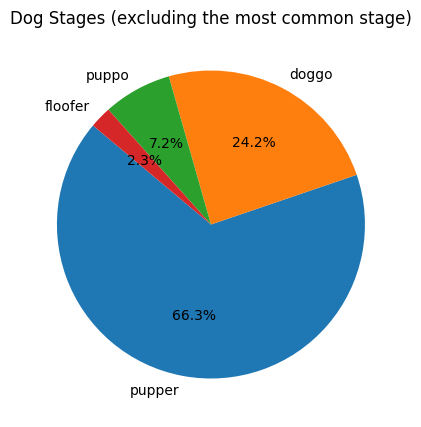

In [93]:
counts = twitter_archive_master['dog_stage'].value_counts()
most_common_value = counts.idxmax()
filtered_counts = counts[counts.index != most_common_value]
plt.figure(figsize=(5, 5))
plt.pie(filtered_counts, labels=filtered_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Dog Stages (excluding the most common stage)')
plt.show()

In [94]:
twitter_archive_master.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'created_at', 'id_str', 'full_text', 'display_text_range',
       'entities', 'extended_entities', 'user', 'retweet_count',
       'favorite_count', 'favorited', 'lang', 'dog_stage'],
      dtype='object')

### The Most liked Dog Breed

In [95]:
twitter_archive_master['p1'].value_counts().head(6)

p1
golden_retriever      139
Labrador_retriever     95
Pembroke               88
Chihuahua              79
pug                    54
chow                   41
Name: count, dtype: int64

In [96]:
top_6_p1_values = twitter_archive_master['p1'].value_counts().head(6).index

In [97]:
filtered_df = twitter_archive_master[twitter_archive_master['p1'].isin(top_6_p1_values)]
sum_favorite_count = filtered_df.groupby('p1')['favorite_count'].sum()


In [98]:
sum_favorite_count.sort_values(ascending=False)

p1
golden_retriever      1696627
Labrador_retriever    1123850
Pembroke               994755
Chihuahua              676441
chow                   404241
pug                    320223
Name: favorite_count, dtype: int64

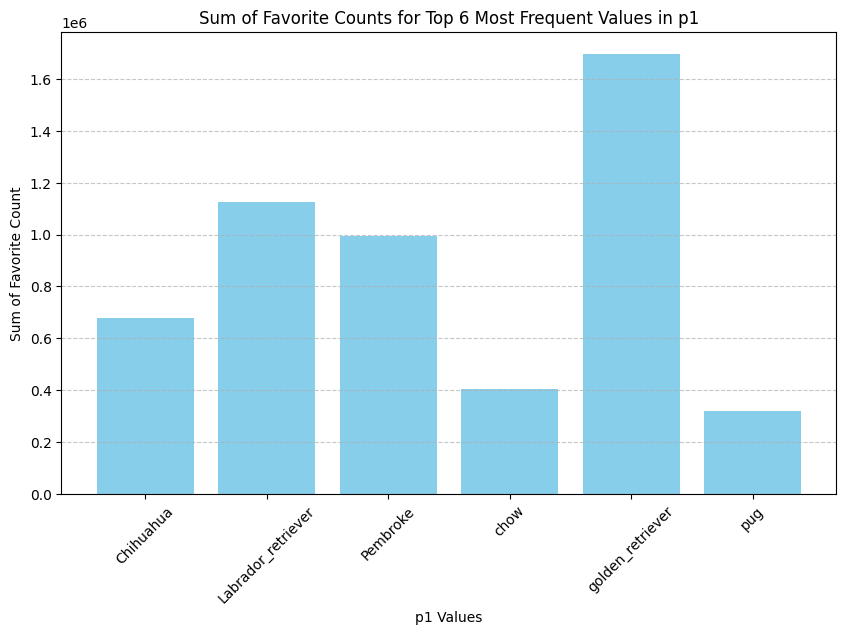

In [99]:
plt.figure(figsize=(10, 6))
plt.bar(sum_favorite_count.index, sum_favorite_count.values, color='skyblue')

plt.title('Sum of Favorite Counts for Top 6 Most Frequent Values in p1')
plt.xlabel('p1 Values')
plt.ylabel('Sum of Favorite Count')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Optional: Add gridlines for better readability
plt.show()

## **Deliverables:** ✅✅✅✅✅
1. `twitter_archive_master.csv`
2. `wrangle_report.pdf`
3. `act_report.pdf`
4. `Analysis_Notebook.ipynb`